In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('DATA.csv')

In [ ]:
df.head()

,Id,X,Y,twi2,asp2,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,road,river,pcp,index
0,1,-565155.8849,371574.0348,3,2,5,4,3,2,3,2,4,5,3,2,5,2,0
1,1,-490208.7562,371619.6100,4,2,4,4,3,2,3,2,3,4,3,1,5,2,1
2,1,-814589.1191,513177.4706,4,5,4,4,2,2,3,2,4,5,3,2,4,2,2
3,1,-467596.1093,454916.8753,2,2,5,4,3,2,3,2,3,4,3,1,4,2,3
4,1,-738400.4433,508255.4875,3,3,5,4,2,2,4,4,4,4,3,1,3,2,4


In [ ]:
df['Id'].value_counts()

Id
1    6000
0    6000
Name: count, dtype: int64

In [ ]:
df.shape

(12000, 18)

In [ ]:
df = pd.read_csv('DATA.csv', names= ['Wildfire', 'X', 'Y', 'twi', 'aspect', 'temp_july', 'temp_max',
                                       'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug',
                                       'elevation', 'dist_road', 'dist_river', 'pcp', 'index'
                                                   ], header= 0
                      )

In [ ]:
df.head()

,Wildfire,X,Y,twi,aspect,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp,index
0,1,-565155.8849,371574.0348,3,2,5,4,3,2,3,2,4,5,3,2,5,2,0
1,1,-490208.7562,371619.6100,4,2,4,4,3,2,3,2,3,4,3,1,5,2,1
2,1,-814589.1191,513177.4706,4,5,4,4,2,2,3,2,4,5,3,2,4,2,2
3,1,-467596.1093,454916.8753,2,2,5,4,3,2,3,2,3,4,3,1,4,2,3
4,1,-738400.4433,508255.4875,3,3,5,4,2,2,4,4,4,4,3,1,3,2,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wildfire    12000 non-null  int64  
 1   X           12000 non-null  float64
 2   Y           12000 non-null  float64
 3   twi         12000 non-null  int64  
 4   aspect      12000 non-null  int64  
 5   temp_july   12000 non-null  int64  
 6   temp_max    12000 non-null  int64  
 7   soilmois    12000 non-null  int64  
 8   slope       12000 non-null  int64  
 9   ndvi        12000 non-null  int64  
 10  lulc        12000 non-null  int64  
 11  dist_lake   12000 non-null  int64  
 12  evt_aug     12000 non-null  int64  
 13  elevation   12000 non-null  int64  
 14  dist_road   12000 non-null  int64  
 15  dist_river  12000 non-null  int64  
 16  pcp         12000 non-null  int64  
 17  index       12000 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 1.6 MB


In [ ]:
df = df.astype(
    {
        'Wildfire': 'category',
        'twi': 'category',
        'aspect': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category'
    }
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Wildfire    12000 non-null  category
 1   X           12000 non-null  float64 
 2   Y           12000 non-null  float64 
 3   twi         12000 non-null  category
 4   aspect      12000 non-null  category
 5   temp_july   12000 non-null  category
 6   temp_max    12000 non-null  category
 7   soilmois    12000 non-null  category
 8   slope       12000 non-null  category
 9   ndvi        12000 non-null  category
 10  lulc        12000 non-null  category
 11  dist_lake   12000 non-null  category
 12  evt_aug     12000 non-null  category
 13  elevation   12000 non-null  category
 14  dist_road   12000 non-null  category
 15  dist_river  12000 non-null  category
 16  pcp         12000 non-null  category
 17  index       12000 non-null  int64   
dtypes: category(15), float64(2), int64(1)
memory u

In [ ]:
df[df.isnull().any(axis= 1)]

,Wildfire,X,Y,twi,aspect,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp,index


In [ ]:
new_order = [
             'index', 'X', 'Y', 'twi', 'aspect', 'temp_july', 'temp_max', 'soilmois', 'slope', 'ndvi',
             'lulc', 'dist_lake', 'evt_aug', 'elevation', 'dist_road', 'dist_river', 'pcp',  'Wildfire'
            ]
df = df[new_order]
df

,index,X,Y,twi,aspect,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp,Wildfire
0,0,-5.651559e+05,3.715740e+05,3,2,5,4,3,2,3,2,4,5,3,2,5,2,1
1,1,-4.902088e+05,3.716196e+05,4,2,4,4,3,2,3,2,3,4,3,1,5,2,1
2,2,-8.145891e+05,5.131775e+05,4,5,4,4,2,2,3,2,4,5,3,2,4,2,1
3,3,-4.675961e+05,4.549169e+05,2,2,5,4,3,2,3,2,3,4,3,1,4,2,1
4,4,-7.384004e+05,5.082555e+05,3,3,5,4,2,2,4,4,4,4,3,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,-1.680890e+06,2.620365e+06,1,2,3,2,1,4,3,4,5,2,3,3,3,1,0
11996,11996,-1.648350e+06,2.605284e+06,1,2,3,2,1,4,3,5,5,1,3,3,3,1,0
11997,11997,-1.621360e+06,2.652115e+06,5,2,2,2,1,4,3,3,5,1,3,3,4,1,0
11998,11998,-1.544370e+06,2.656084e+06,1,4,2,2,1,4,3,5,5,1,3,3,4,1,0


In [ ]:
col_to_drop = ['index', 'X', 'Y']
df = df.drop(columns= col_to_drop, axis= 1)

In [ ]:
df.head()

,twi,aspect,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp,Wildfire
0,3,2,5,4,3,2,3,2,4,5,3,2,5,2,1
1,4,2,4,4,3,2,3,2,3,4,3,1,5,2,1
2,4,5,4,4,2,2,3,2,4,5,3,2,4,2,1
3,2,2,5,4,3,2,3,2,3,4,3,1,4,2,1
4,3,3,5,4,2,2,4,4,4,4,3,1,3,2,1


# Multi Collinearity Analysis (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df, exclude_columns=None):
    # Set default for exclude_columns if not provided
    if exclude_columns is None:
        exclude_columns = []

    # Always exclude 'X', 'Y', and 'index' in addition to other specified columns
    always_exclude = ['index', 'Wildfire']
    all_exclusions = set(exclude_columns).union(always_exclude)

    # Drop excluded columns
    df_filtered = df.drop(columns=all_exclusions, errors='ignore')  # 'errors=ignore' prevents errors if the column doesn't exist

    # Calculate VIF for each variable that remains
    vifs = [variance_inflation_factor(df_filtered.values, i) for i in range(df_filtered.shape[1])]
    tolerance = [1/vif for vif in vifs]

    # Prepare the VIF DataFrame
    vif_data = pd.DataFrame({
        'VIF': vifs,
        'Tolerance': tolerance
    }, index=df_filtered.columns)

    return vif_data

# Specify additional columns to exclude as needed
additional_excludes = ['index', 'Wildfire']  # Add any other columns you wish to exclude

# Calculate VIF excluding specified columns along with 'X', 'Y', and 'index'
vif_data = calculate_vif(df, exclude_columns=additional_excludes)

print(vif_data)


                  VIF  Tolerance
twi          5.781577   0.172963
aspect       8.801826   0.113613
temp_july   22.369443   0.044704
temp_max    48.481559   0.020626
soilmois     8.614770   0.116080
slope       14.472446   0.069097
ndvi        13.674495   0.073129
lulc         6.634165   0.150735
dist_lake   15.915983   0.062830
evt_aug     31.076235   0.032179
elevation   14.003389   0.071411
dist_road    9.152013   0.109266
dist_river  20.113462   0.049718
pcp         14.261364   0.070120


<ipython-input-40-56db3dbb2689>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)


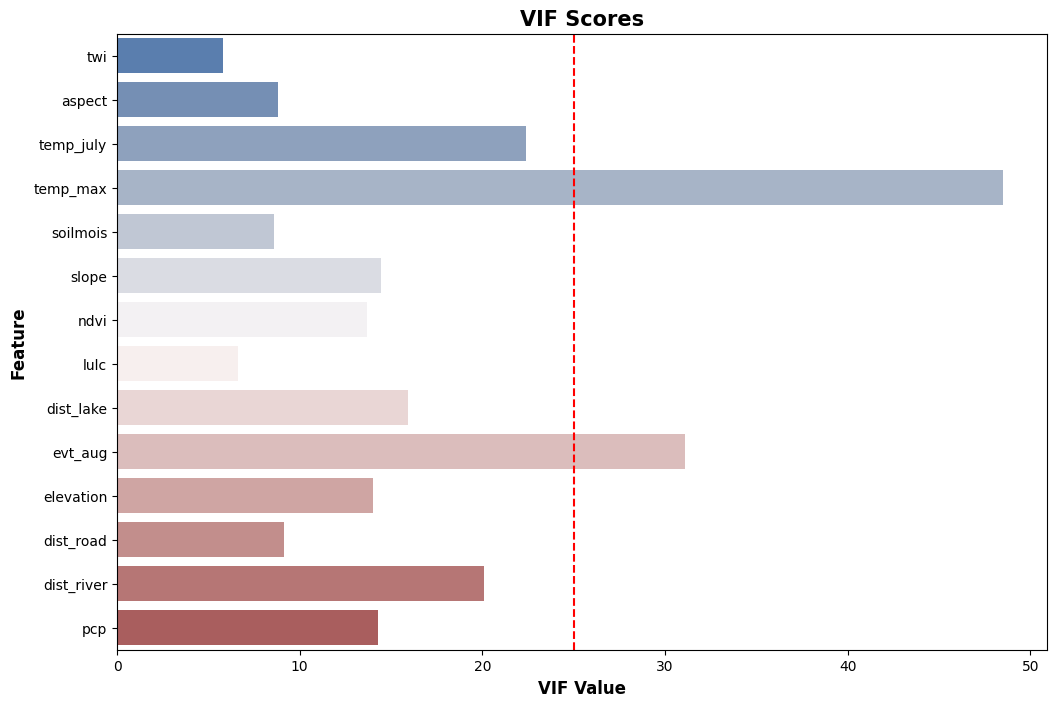

In [ ]:
def plot_vif(vif_data):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Plot the VIF values
    sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)
    ax.axvline(x=25, color="red", linestyle="--")  # Add a vertical line at VIF = 30
    ax.set_title('VIF Scores', fontweight='bold', fontsize=15)
    ax.set_xlabel('VIF Value', fontweight='bold', fontsize=12)
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12)

    # Display the plot
    plt.show()

plot_vif(vif_data)

In [ ]:
col_to_drop = ['temp_max', 'evt_aug']
df = df.drop(columns= col_to_drop, axis= 1)

# Feature Importance using Random forest classifier

In [ ]:
df.columns

Index(['twi', 'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
       'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp', 'Wildfire'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the feature matrix X and the target variable y

X = df[
    ['twi', 'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
     'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp']
]
y = df['Wildfire']

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Calculate the sum of importances
total_importance = feature_importance['Importance'].sum()

# Calculate the weights by dividing each importance by the total importance
feature_importance['Weight'] = feature_importance['Importance'] / total_importance

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importances with weights
print(feature_importance)


       Feature  Importance    Weight
5         ndvi    0.162764  0.162764
6         lulc    0.158153  0.158153
2    temp_july    0.152578  0.152578
9    dist_road    0.117433  0.117433
11         pcp    0.097633  0.097633
8    elevation    0.064682  0.064682
3     soilmois    0.062384  0.062384
7    dist_lake    0.053279  0.053279
10  dist_river    0.039206  0.039206
4        slope    0.035565  0.035565
1       aspect    0.033096  0.033096
0          twi    0.023227  0.023227


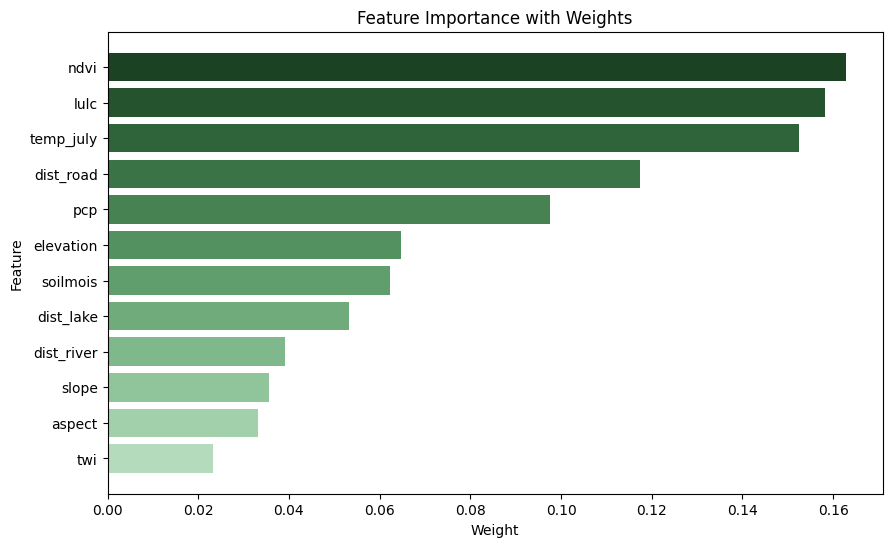

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
palette = sns.cubehelix_palette(len(feature_importance['Feature']), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Create a graph
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=palette)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance with Weights')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Show the graph
plt.show()

## Featuer Importance using permutation feature importance

<ipython-input-45-a888dc4e3824>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')


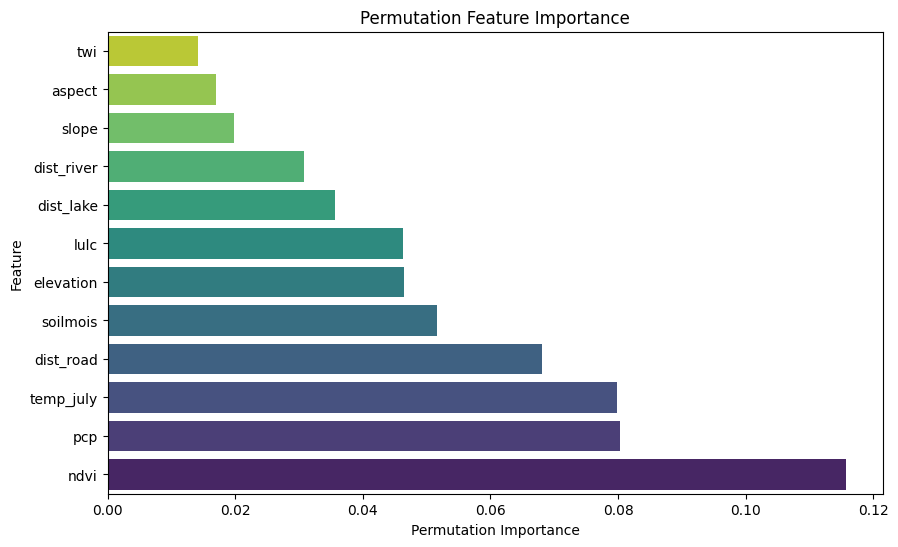

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the features and target variable
X = df[
    ['twi', 'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
     'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp']
]
y = df['Wildfire']

# Initialize and train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Compute permutation feature importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Get the feature names
feature_names = X.columns

# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
})

# Sort the DataFrame by importance
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()


# Feature Selection using RFE

Feature Rankings:
       Feature  Ranking  Selected
1       aspect        1      True
2    temp_july        1      True
3     soilmois        1      True
4        slope        1      True
5         ndvi        1      True
6         lulc        1      True
7    dist_lake        1      True
8    elevation        1      True
9    dist_road        1      True
10  dist_river        1      True
11         pcp        1      True
0          twi        2     False
Least Important Feature to be removed: twi
DataFrame after removing the least important feature:
  aspect temp_july soilmois slope ndvi lulc dist_lake elevation dist_road  \
0      2         5        3     2    3    2         4         3         2   
1      2         4        3     2    3    2         3         3         1   
2      5         4        2     2    3    2         4         3         2   
3      2         5        3     2    3    2         3         3         1   
4      3         5        2     2    4    4         4     

<ipython-input-46-3263819583be>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')


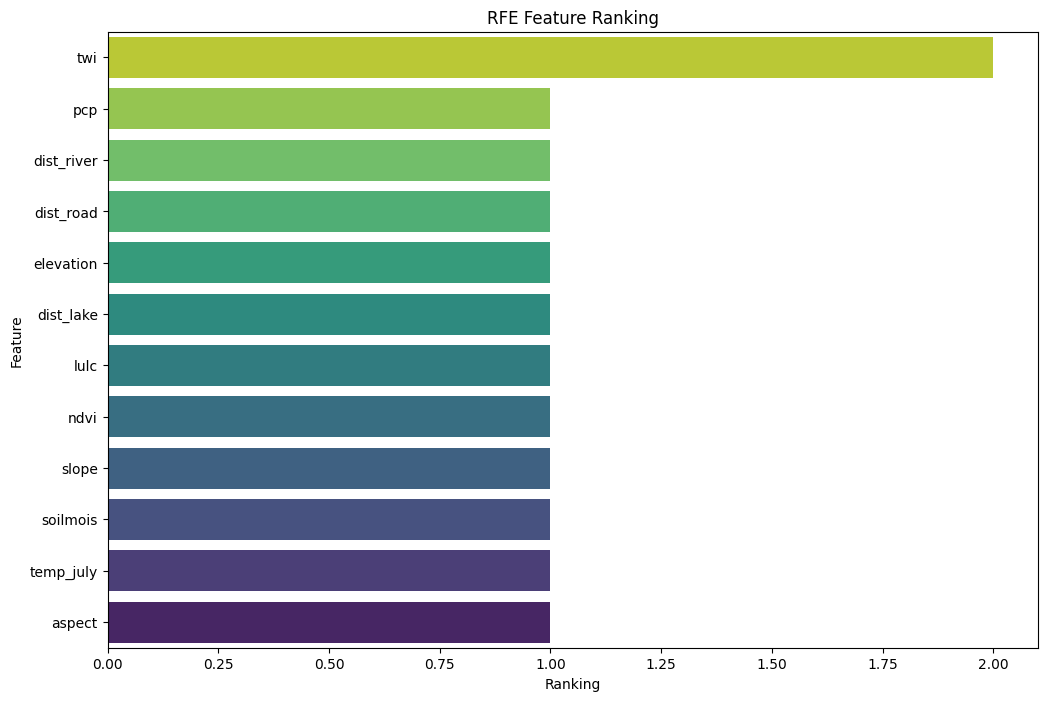

In [ ]:
from sklearn.feature_selection import RFE

# Initialize RFE with the random forest classifier, specifying the number of features you want to select
n_features_to_select = X.shape[1] - 1  # One less than the total number of features
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select, step=1)

# Fit RFE
rfe.fit(X, y)

# Create a DataFrame to display feature names and their corresponding rankings
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_  # This will be True for selected features and False otherwise
})

# Sort DataFrame by ranking
feature_ranking = feature_ranking.sort_values('Ranking')

print("Feature Rankings:")
print(feature_ranking)

# Identify the least important feature (with the highest rank)
least_important_feature = feature_ranking[feature_ranking['Ranking'] == feature_ranking['Ranking'].max()]['Feature'].values[0]
print(f'Least Important Feature to be removed: {least_important_feature}')

# Drop the least important feature from the DataFrame
df = df.drop(columns=[least_important_feature])

print(f'DataFrame after removing the least important feature:\n{df.head()}')

# Visualize the feature rankings
plt.figure(figsize=(12, 8))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('RFE Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df.columns

Index(['aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake',
       'elevation', 'dist_road', 'dist_river', 'pcp', 'Wildfire'],
      dtype='object')

# Split data into Train and Test and Encoding categorical features

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

categorical_columns = [
    'aspect', 'temp_july', 'soilmois', 'slope', 'ndvi', 'lulc',
    'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp'
]

# Prepare the features and target variable without dropping any columns
X = df.drop(['Wildfire'], axis=1)
y = df['Wildfire']

# Split data into training and remaining sets (temporary set for further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42                     )

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder on training data and transform the training, validation, and test data for categorical columns
encoder.fit(X_train[categorical_columns])
encoded_train = encoder.transform(X_train[categorical_columns])
encoded_val = encoder.transform(X_val[categorical_columns])
encoded_test = encoder.transform(X_test[categorical_columns])

# Convert the encoded features into a DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_val_df = pd.DataFrame(encoded_val, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the non-categorical data
final_train_df = pd.concat([X_train.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_train_df], axis=1)
final_val_df = pd.concat([X_val.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_val_df], axis=1)
final_test_df = pd.concat([X_test.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_test_df], axis=1)

# Add the target variable 'Wildfire' back to the final datasets
final_train_df['Wildfire'] = y_train.reset_index(drop=True)
final_val_df['Wildfire'] = y_val.reset_index(drop=True)
final_test_df['Wildfire'] = y_test.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Machine Learning algorithms

In [ ]:
final_train_df.shape

(8400, 60)

In [ ]:
final_val_df.shape

(1800, 60)

In [ ]:
final_test_df.shape

(1800, 60)

## ANN

Epoch 1/5
263/263 [==============================] - 2s 3ms/step - loss: 0.6602 - accuracy: 0.6070 - val_loss: 0.5491 - val_accuracy: 0.8422
Epoch 2/5
263/263 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7837 - val_loss: 0.3704 - val_accuracy: 0.9011
Epoch 3/5
263/263 [==============================] - 1s 3ms/step - loss: 0.4318 - accuracy: 0.8342 - val_loss: 0.3017 - val_accuracy: 0.9150
Epoch 4/5
263/263 [==============================] - 1s 3ms/step - loss: 0.3943 - accuracy: 0.8464 - val_loss: 0.2739 - val_accuracy: 0.9222
Epoch 5/5
57/57 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9278
Test Loss: 0.2584387958049774
Test Accuracy: 0.9277777671813965
57/57 [==============================] - 0s 1ms/step


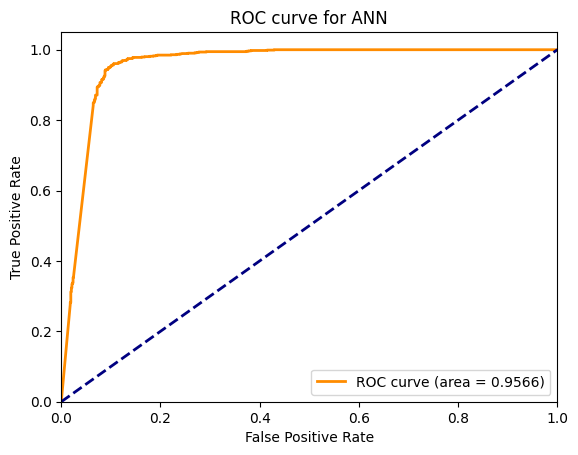

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the ANN model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(8, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create the model
input_dim = final_train_df.shape[1] - 1  # Exclude the target variable 'Wildfire'
model = create_ann_model(input_dim)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Separate features and target variables for training and validation sets
X_train = final_train_df.drop('Wildfire', axis=1)
y_train = final_train_df['Wildfire']
X_val = final_val_df.drop('Wildfire', axis=1)
y_val = final_val_df['Wildfire']

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
X_test = final_test_df.drop('Wildfire', axis=1)
y_test = final_test_df['Wildfire']
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_test_pred_prob = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for ANN')
plt.legend(loc='lower right')
plt.show()


# CNN

Epoch 1/5
263/263 [==============================] - 3s 6ms/step - loss: 0.6279 - accuracy: 0.6442 - val_loss: 0.4136 - val_accuracy: 0.8794
Epoch 2/5
263/263 [==============================] - 1s 5ms/step - loss: 0.4736 - accuracy: 0.7838 - val_loss: 0.3427 - val_accuracy: 0.8778
Epoch 3/5
263/263 [==============================] - 1s 5ms/step - loss: 0.4266 - accuracy: 0.8112 - val_loss: 0.3194 - val_accuracy: 0.8839
Epoch 4/5
263/263 [==============================] - 2s 7ms/step - loss: 0.4078 - accuracy: 0.8232 - val_loss: 0.3037 - val_accuracy: 0.8889
Epoch 5/5
57/57 [==============================] - 0s 2ms/step


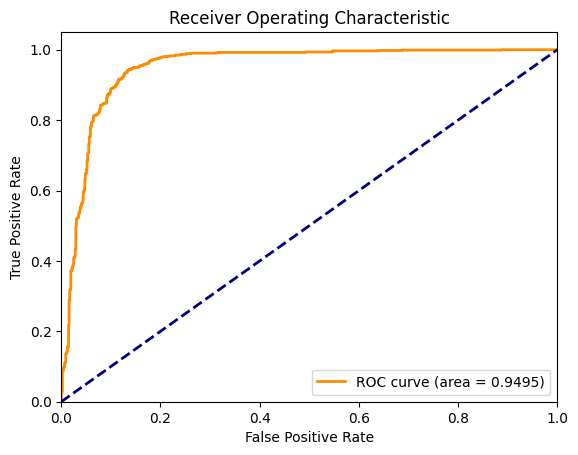

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Conv1D(filters=8, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Assuming 'input_shape' is known and appropriate for a CNN
input_shape = (final_train_df.shape[1] - 1, 1)  # Exclude the target variable 'Wildfire'

# Prepare data
# Convert categorical target data to numpy arrays
y_train = np.array(final_train_df['Wildfire']).astype('float32')
y_val = np.array(final_val_df['Wildfire']).astype('float32')
y_test = np.array(final_test_df['Wildfire']).astype('float32')

# Reshape input data for CNN input
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)

# Create and compile the CNN model
model = create_cnn_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# BiLSTM

Epoch 1/5
263/263 [==============================] - 13s 14ms/step - loss: 0.5992 - accuracy: 0.7149 - val_loss: 0.3951 - val_accuracy: 0.9117
Epoch 2/5
263/263 [==============================] - 2s 7ms/step - loss: 0.3499 - accuracy: 0.8982 - val_loss: 0.2384 - val_accuracy: 0.9244
Epoch 3/5
263/263 [==============================] - 3s 12ms/step - loss: 0.2776 - accuracy: 0.9106 - val_loss: 0.2189 - val_accuracy: 0.9272
Epoch 4/5
263/263 [==============================] - 2s 9ms/step - loss: 0.2642 - accuracy: 0.9133 - val_loss: 0.2111 - val_accuracy: 0.9306
Epoch 5/5
57/57 [==============================] - 3s 4ms/step


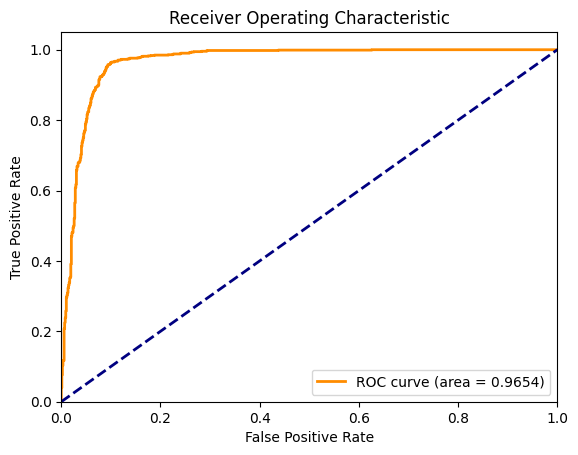

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiLSTM model
def create_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(8, return_sequences=True), input_shape=input_shape),
        Dropout(0.5),
        Bidirectional(LSTM(4)),
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_bilstm_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the BiLSTM input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# LSTM

Epoch 1/5
263/263 [==============================] - 7s 11ms/step - loss: 0.6415 - accuracy: 0.6382 - val_loss: 0.4370 - val_accuracy: 0.9011
Epoch 2/5
263/263 [==============================] - 3s 12ms/step - loss: 0.3828 - accuracy: 0.8613 - val_loss: 0.2431 - val_accuracy: 0.9206
Epoch 3/5
263/263 [==============================] - 2s 6ms/step - loss: 0.3155 - accuracy: 0.8821 - val_loss: 0.2314 - val_accuracy: 0.9233
Epoch 4/5
263/263 [==============================] - 1s 6ms/step - loss: 0.2968 - accuracy: 0.8854 - val_loss: 0.2172 - val_accuracy: 0.9289
Epoch 5/5
57/57 [==============================] - 1s 2ms/step


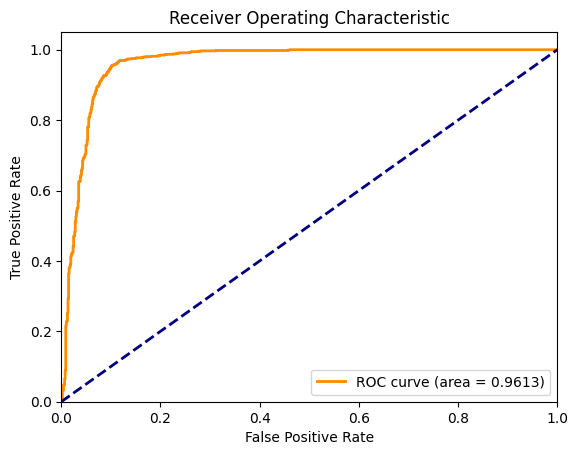

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(8, return_sequences=True, input_shape=input_shape),
        Dropout(0.5),
        LSTM(4, return_sequences=False),  # Remove return_sequences if you only want the last output
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_lstm_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the LSTM input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# RNN

Epoch 1/5
263/263 [==============================] - 5s 9ms/step - loss: 0.6745 - accuracy: 0.5745 - val_loss: 0.5220 - val_accuracy: 0.8667
Epoch 2/5
263/263 [==============================] - 1s 5ms/step - loss: 0.4924 - accuracy: 0.7752 - val_loss: 0.3037 - val_accuracy: 0.9128
Epoch 3/5
263/263 [==============================] - 1s 5ms/step - loss: 0.3702 - accuracy: 0.8523 - val_loss: 0.2487 - val_accuracy: 0.9183
Epoch 4/5
263/263 [==============================] - 1s 4ms/step - loss: 0.3365 - accuracy: 0.8658 - val_loss: 0.2381 - val_accuracy: 0.9167
Epoch 5/5
57/57 [==============================] - 0s 2ms/step


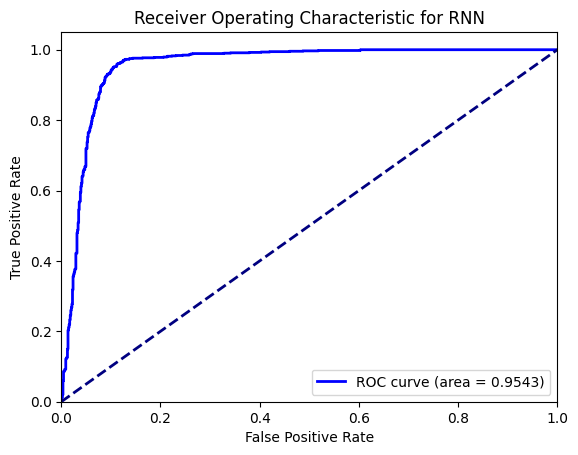

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the RNN model
def create_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(8, return_sequences=True, input_shape=input_shape),
        Dropout(0.5),
        SimpleRNN(4, return_sequences=False),  # Only return the final output
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_rnn_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the RNN input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()


# BiRNN

Epoch 1/5
263/263 [==============================] - 11s 8ms/step - loss: 0.5630 - accuracy: 0.6940 - val_loss: 0.3156 - val_accuracy: 0.9094
Epoch 2/5
263/263 [==============================] - 2s 6ms/step - loss: 0.3515 - accuracy: 0.8657 - val_loss: 0.2355 - val_accuracy: 0.9206
Epoch 3/5
263/263 [==============================] - 1s 5ms/step - loss: 0.3034 - accuracy: 0.8939 - val_loss: 0.2281 - val_accuracy: 0.9194
Epoch 4/5
263/263 [==============================] - 1s 5ms/step - loss: 0.2918 - accuracy: 0.8998 - val_loss: 0.2251 - val_accuracy: 0.9194
Epoch 5/5
57/57 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.9233
Test Loss: 0.22968509793281555
Test Accuracy: 0.9233333468437195
57/57 [==============================] - 1s 4ms/step


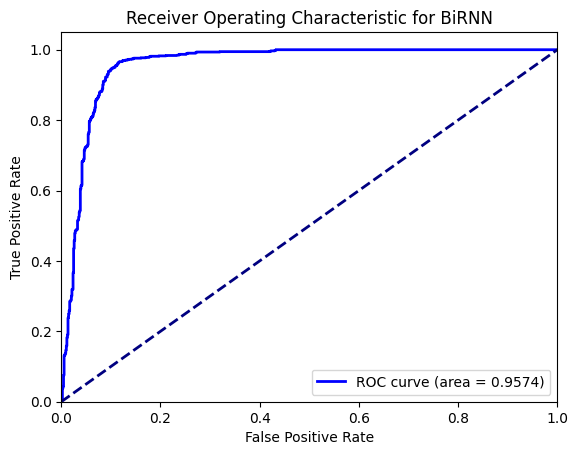

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiRNN model
def create_birnn_model(input_shape):
    model = Sequential([
        Bidirectional(SimpleRNN(8, return_sequences=True), input_shape=input_shape),
        Dropout(0.5),
        Bidirectional(SimpleRNN(4, return_sequences=False)),  # Only return the final output
        Dropout(0.5),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
    ])
    return model

# Assuming input_shape based on the final_train_df without the target column
input_shape = (1, final_train_df.shape[1] - 1)  # Only one timestep, features equal to number of columns minus target

# Create the model
model = create_birnn_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Convert target data to float32 to avoid TypeError
y_train = final_train_df['Wildfire'].astype('float32').values
y_val = final_val_df['Wildfire'].astype('float32').values
y_test = final_test_df['Wildfire'].astype('float32').values

# Reshape data to fit the RNN input requirements: [samples, timesteps, features]
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_train_df.shape[1] - 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_val_df.shape[1] - 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, 1, final_test_df.shape[1] - 1)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BiRNN')
plt.legend(loc="lower right")
plt.show()


# BWO-RNN

In [ ]:
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1])
        }
        population.append(spider)
    return population


In [ ]:
def bwo_crossover_and_cannibalism(population):
    # This is a simplified version. You will need to adapt it based on actual BWO behavior.
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population


In [ ]:
def bwo_select_survivors(population, max_population_size):
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]


In [ ]:
def bwo_optimize_rnn(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(10, param_bounds)
    max_generations = 20

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_rnn_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)

    return best_params


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the following optimal parameters were found
optimal_params = {
    'units': 32,
    'dropout': 0.3
}

def create_optimized_rnn_model(params, input_feature_count):
    model = Sequential([
        SimpleRNN(params['units'], input_shape=(1, input_feature_count), return_sequences=True),
        Dropout(params['dropout']),
        SimpleRNN(params['units'], return_sequences=False),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Assuming input_shape based on your dataset
input_feature_count = X_train.shape[2]  # Assuming X_train is already appropriately shaped

# Create the model with optimal parameters
model = create_optimized_rnn_model(optimal_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
263/263 [==============================] - 4s 6ms/step - loss: 0.3642 - accuracy: 0.8462 - val_loss: 0.2261 - val_accuracy: 0.9228
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 0.2540 - accuracy: 0.9093 - val_loss: 0.2157 - val_accuracy: 0.9250
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 0.2390 - accuracy: 0.9125 - val_loss: 0.2088 - val_accuracy: 0.9261
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.9179 - val_loss: 0.2052 - val_accuracy: 0.9289
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 0.2209 - accuracy: 0.9183 - val_loss: 0.1984 - val_accuracy: 0.9261
Epoch 6/20
263/263 [==============================] - 2s 7ms/step - loss: 0.2123 - accuracy: 0.9236 - val_loss: 0.1921 - val_accuracy: 0.9289
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 0.2111 - accuracy: 0.9263 - val_loss: 0.1908 - val_accuracy: 0.9333
Epoch 

57/57 [==============================] - 0s 2ms/step


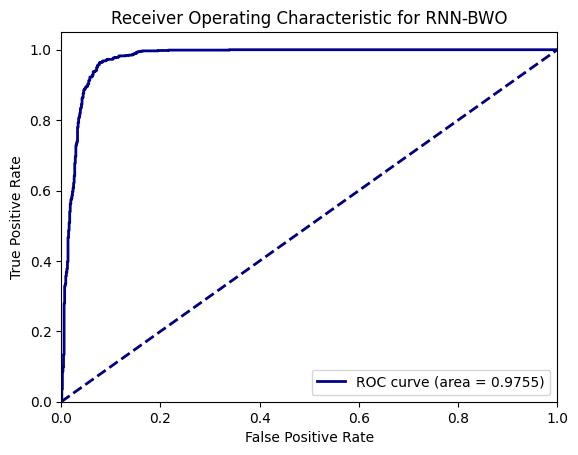

In [ ]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN-BWO')
plt.legend(loc="lower right")
plt.show()


# BWO-BiRNN

Generation 1/10, Best Fitness: 0.1461109071969986
Generation 2/10, Best Fitness: 0.1461109071969986
Generation 3/10, Best Fitness: 0.1461109071969986
Generation 4/10, Best Fitness: 0.1461109071969986
Generation 5/10, Best Fitness: 0.1461109071969986
Generation 6/10, Best Fitness: 0.1461109071969986
Generation 7/10, Best Fitness: 0.1461109071969986
Generation 8/10, Best Fitness: 0.1461109071969986
Generation 9/10, Best Fitness: 0.1461109071969986
Generation 10/10, Best Fitness: 0.1461109071969986
Best Parameters: {'units': 48, 'dropout': 0.4177856408510827, 'fitness': 0.1461109071969986}
Epoch 1/30
263/263 [==============================] - 7s 7ms/step - loss: 0.3606 - accuracy: 0.8445 - val_loss: 0.2270 - val_accuracy: 0.9233
Epoch 2/30
263/263 [==============================] - 1s 6ms/step - loss: 0.2548 - accuracy: 0.9100 - val_loss: 0.2127 - val_accuracy: 0.9261
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 0.2338 - accuracy: 0.9112 - val_loss: 0.2105 - v

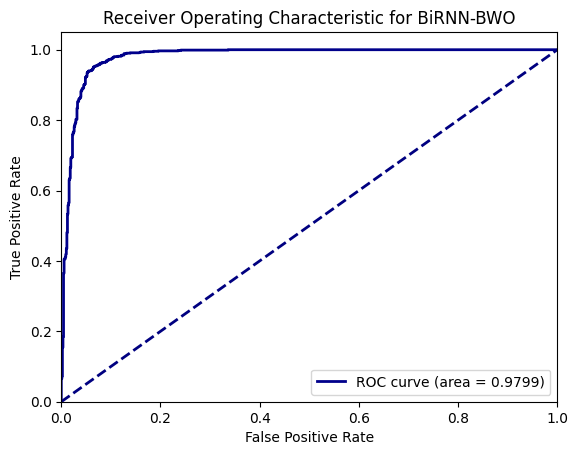

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiRNN model creation function
def create_birnn_model(params, input_feature_count):
    model = Sequential([
        Bidirectional(SimpleRNN(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
        Dropout(params['dropout']),
        Bidirectional(SimpleRNN(params['units'], return_sequences=False)),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize BiRNN using BWO
def bwo_optimize_birnn(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(10, param_bounds)
    max_generations = 10

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_birnn_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=30, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Optimize the BiRNN using BWO
best_params = bwo_optimize_birnn(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_birnn_model(best_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BiRNN-BWO')
plt.legend(loc="lower right")
plt.show()


# LSTM-BWO

Generation 1/5, Best Fitness: 0.14931902289390564
Generation 2/5, Best Fitness: 0.14486227929592133
Generation 3/5, Best Fitness: 0.14486227929592133
Generation 4/5, Best Fitness: 0.13996538519859314
Generation 5/5, Best Fitness: 0.13996538519859314
Best Parameters: {'units': 40, 'dropout': 0.17867182067119836, 'fitness': 0.15410292148590088}
Epoch 1/20
263/263 [==============================] - 8s 9ms/step - loss: 0.3475 - accuracy: 0.8863 - val_loss: 0.2239 - val_accuracy: 0.9228
Epoch 2/20
263/263 [==============================] - 1s 6ms/step - loss: 0.2243 - accuracy: 0.9224 - val_loss: 0.2027 - val_accuracy: 0.9311
Epoch 3/20
263/263 [==============================] - 1s 6ms/step - loss: 0.2099 - accuracy: 0.9239 - val_loss: 0.1955 - val_accuracy: 0.9328
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1988 - accuracy: 0.9270 - val_loss: 0.1883 - val_accuracy: 0.9306
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 0.1891 - accu

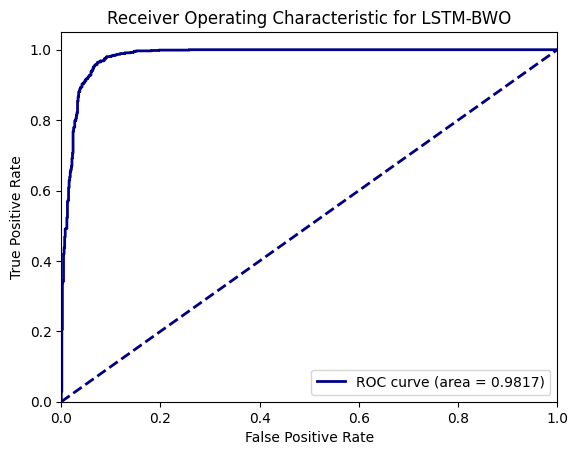

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the LSTM model creation function
def create_lstm_model(params, input_feature_count):
    model = Sequential([
        LSTM(params['units'], input_shape=(1, input_feature_count), return_sequences=True),
        Dropout(params['dropout']),
        LSTM(params['units'], return_sequences=False),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize LSTM using BWO
def bwo_optimize_lstm(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_lstm_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 5)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Optimize the LSTM using BWO
best_params = bwo_optimize_lstm(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_lstm_model(best_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM-BWO')
plt.legend(loc="lower right")
plt.show()


# BiLSTM-BWO

Generation 1/5, Best Fitness: 0.14520566165447235
Generation 2/5, Best Fitness: 0.14421261847019196
Generation 3/5, Best Fitness: 0.14421261847019196
Generation 4/5, Best Fitness: 0.14421261847019196
Generation 5/5, Best Fitness: 0.14402419328689575
Best Parameters: {'units': 35, 'dropout': 0.24816383529247388, 'fitness': 0.14402419328689575}
Epoch 1/20
263/263 [==============================] - 13s 18ms/step - loss: 0.3365 - accuracy: 0.8802 - val_loss: 0.2160 - val_accuracy: 0.9289
Epoch 2/20
263/263 [==============================] - 3s 12ms/step - loss: 0.2201 - accuracy: 0.9205 - val_loss: 0.1987 - val_accuracy: 0.9311
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 0.2040 - accuracy: 0.9238 - val_loss: 0.1931 - val_accuracy: 0.9306
Epoch 4/20
263/263 [==============================] - 2s 9ms/step - loss: 0.1945 - accuracy: 0.9283 - val_loss: 0.1812 - val_accuracy: 0.9361
Epoch 5/20
263/263 [==============================] - 2s 8ms/step - loss: 0.1840 - a

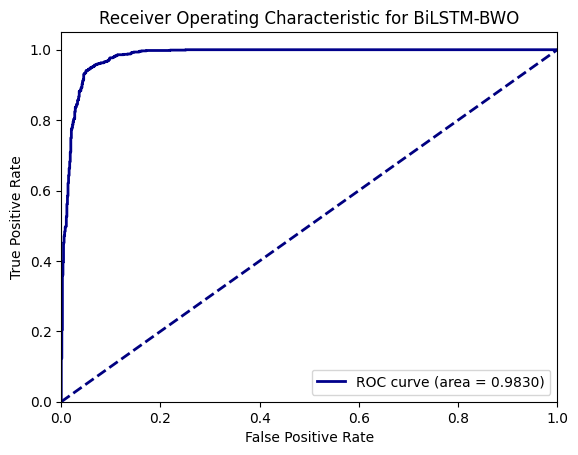

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the BiLSTM model creation function
def create_bilstm_model(params, input_feature_count):
    model = Sequential([
        Bidirectional(LSTM(params['units'], return_sequences=True), input_shape=(1, input_feature_count)),
        Dropout(params['dropout']),
        Bidirectional(LSTM(params['units'], return_sequences=False)),
        Dropout(params['dropout']),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize BiLSTM using BWO
def bwo_optimize_bilstm(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 50), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_bilstm_model(params, X_train.shape[2])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_feature_count = X_train.shape[2]

# Optimize the BiLSTM using BWO
best_params = bwo_optimize_bilstm(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_bilstm_model(best_params, input_feature_count)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for BiLSTM-BWO')
plt.legend(loc="lower right")
plt.show()


# CNN-BWO

Generation 1/5, Best Fitness: 0.15118418633937836
Generation 2/5, Best Fitness: 0.15118418633937836
Generation 3/5, Best Fitness: 0.14859972894191742
Generation 4/5, Best Fitness: 0.14859972894191742
Generation 5/5, Best Fitness: 0.14859972894191742
Best Parameters: {'filters1': 53, 'kernel_size1': 2, 'dropout1': 0.2945198173098188, 'filters2': 23, 'kernel_size2': 5, 'dropout2': 0.32099581740891525, 'dense_units': 49, 'fitness': 0.16015847027301788}
Epoch 1/20
263/263 [==============================] - 4s 10ms/step - loss: 0.3825 - accuracy: 0.8324 - val_loss: 0.2472 - val_accuracy: 0.9078
Epoch 2/20
263/263 [==============================] - 3s 13ms/step - loss: 0.2761 - accuracy: 0.8964 - val_loss: 0.2366 - val_accuracy: 0.9183
Epoch 3/20
263/263 [==============================] - 2s 9ms/step - loss: 0.2585 - accuracy: 0.9030 - val_loss: 0.2213 - val_accuracy: 0.9156
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 0.2491 - accuracy: 0.9079 - val_loss: 0.2104

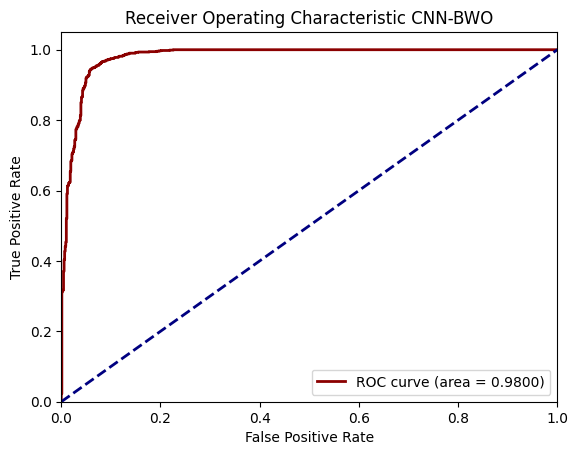

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the CNN model creation function
def create_cnn_model(params, input_shape):
    model = Sequential([
        Conv1D(filters=params['filters1'], kernel_size=params['kernel_size1'], activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(params['dropout1']),
        Conv1D(filters=params['filters2'], kernel_size=params['kernel_size2'], activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(params['dropout2']),
        Flatten(),
        Dense(params['dense_units'], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'filters1': np.random.randint(param_bounds['filters'][0], param_bounds['filters'][1] + 1),
            'kernel_size1': np.random.randint(param_bounds['kernel_size'][0], param_bounds['kernel_size'][1] + 1),
            'dropout1': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'filters2': np.random.randint(param_bounds['filters'][0], param_bounds['filters'][1] + 1),
            'kernel_size2': np.random.randint(param_bounds['kernel_size'][0], param_bounds['kernel_size'][1] + 1),
            'dropout2': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'dense_units': np.random.randint(param_bounds['dense_units'][0], param_bounds['dense_units'][1] + 1),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'filters1': int((spider['filters1'] + partner['filters1']) / 2),
                'kernel_size1': int((spider['kernel_size1'] + partner['kernel_size1']) / 2),
                'dropout1': (spider['dropout1'] + partner['dropout1']) / 2,
                'filters2': int((spider['filters2'] + partner['filters2']) / 2),
                'kernel_size2': int((spider['kernel_size2'] + partner['kernel_size2']) / 2),
                'dropout2': (spider['dropout2'] + partner['dropout2']) / 2,
                'dense_units': int((spider['dense_units'] + partner['dense_units']) / 2),
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize CNN using BWO
def bwo_optimize_cnn(X_train, y_train, X_val, y_val):
    param_bounds = {
        'filters': (16, 64),
        'kernel_size': (2, 5),
        'dropout': (0.1, 0.5),
        'dense_units': (8, 64)
    }
    population = initialize_bwo_population(10, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {
                'filters1': spider['filters1'],
                'kernel_size1': spider['kernel_size1'],
                'dropout1': spider['dropout1'],
                'filters2': spider['filters2'],
                'kernel_size2': spider['kernel_size2'],
                'dropout2': spider['dropout2'],
                'dense_units': spider['dense_units']
            }
            model = create_cnn_model(params, X_train.shape[1:])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=20, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 10)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming input_shape based on your dataset
input_shape = (final_train_df.shape[1] - 1, 1)  # Exclude the target variable 'Wildfire'

# Prepare data
# Convert categorical target data to numpy arrays
y_train = np.array(final_train_df['Wildfire']).astype('float32')
y_val = np.array(final_val_df['Wildfire']).astype('float32')
y_test = np.array(final_test_df['Wildfire']).astype('float32')

# Reshape input data for CNN input
X_train = final_train_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_val = final_val_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)
X_test = final_test_df.drop('Wildfire', axis=1).values.reshape(-1, input_shape[0], 1)

# Optimize the CNN using BWO
best_params = bwo_optimize_cnn(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_cnn_model(best_params, input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for ROC curve
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN-BWO')
plt.legend(loc="lower right")
plt.show()


# ANN-BWO

Generation 1/5, Best Fitness: 0.14983616769313812
Generation 2/5, Best Fitness: 0.14347431063652039
Generation 3/5, Best Fitness: 0.14347431063652039
Generation 4/5, Best Fitness: 0.14347431063652039
Generation 5/5, Best Fitness: 0.14347431063652039
Best Parameters: {'units': 93, 'dropout': 0.43061696212994394, 'fitness': 0.14347431063652039}
Epoch 1/20
263/263 [==============================] - 2s 4ms/step - loss: 0.3515 - accuracy: 0.8533 - val_loss: 0.2168 - val_accuracy: 0.9250
Epoch 2/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2374 - accuracy: 0.9156 - val_loss: 0.2013 - val_accuracy: 0.9311
Epoch 3/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2199 - accuracy: 0.9217 - val_loss: 0.1877 - val_accuracy: 0.9361
Epoch 4/20
263/263 [==============================] - 1s 3ms/step - loss: 0.2054 - accuracy: 0.9262 - val_loss: 0.1806 - val_accuracy: 0.9367
Epoch 5/20
263/263 [==============================] - 1s 3ms/step - loss: 0.1913 - accu

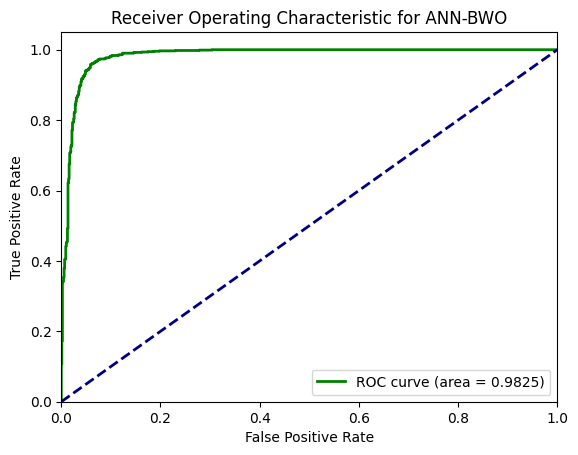

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the ANN model creation function
def create_ann_model(params, input_dim):
    model = Sequential([
        Dense(params['units'], input_dim=input_dim, activation='relu'),
        Dropout(params['dropout']),
        Dense(params['units'], activation='relu'),
        Dropout(params['dropout']),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize BWO population
def initialize_bwo_population(pop_size, param_bounds):
    population = []
    for _ in range(pop_size):
        spider = {
            'units': np.random.randint(param_bounds['units'][0], param_bounds['units'][1] + 1),
            'dropout': np.random.uniform(param_bounds['dropout'][0], param_bounds['dropout'][1]),
            'fitness': None  # Initialize fitness
        }
        population.append(spider)
    return population

# BWO Crossover and Cannibalism
def bwo_crossover_and_cannibalism(population):
    new_population = []
    for spider in population:
        if np.random.rand() < 0.5:  # Random chance to mate
            partner = np.random.choice(population)
            child = {
                'units': int((spider['units'] + partner['units']) / 2),
                'dropout': (spider['dropout'] + partner['dropout']) / 2,
                'fitness': None  # Reset fitness for new child
            }
            new_population.append(child)
        else:
            new_population.append(spider)
    return new_population

# Select survivors based on fitness
def bwo_select_survivors(population, max_population_size):
    # Ensure all spiders have a fitness value
    for spider in population:
        if spider['fitness'] is None:
            spider['fitness'] = float('inf')  # Assign worst fitness if not evaluated
    # Sort by fitness and select the top survivors
    sorted_population = sorted(population, key=lambda x: x['fitness'])
    return sorted_population[:max_population_size]

# Optimize ANN using BWO
def bwo_optimize_ann(X_train, y_train, X_val, y_val):
    param_bounds = {'units': (10, 100), 'dropout': (0.1, 0.5)}
    population = initialize_bwo_population(5, param_bounds)
    max_generations = 5

    best_fitness = float('inf')
    best_params = None

    for generation in range(max_generations):
        for spider in population:
            params = {'units': spider['units'], 'dropout': spider['dropout']}
            model = create_ann_model(params, X_train.shape[1])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=30, verbose=0)  # Reduced verbosity for optimization
            loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
            spider['fitness'] = loss  # Lower loss is better

            if spider['fitness'] < best_fitness:
                best_fitness = spider['fitness']
                best_params = spider

        population = bwo_crossover_and_cannibalism(population)
        population = bwo_select_survivors(population, 5)
        print(f"Generation {generation+1}/{max_generations}, Best Fitness: {best_fitness}")

    return best_params

# Assuming X_train, X_val, y_train, y_val, X_test, and y_test are already defined
input_dim = X_train.shape[1]

# Optimize the ANN using BWO
best_params = bwo_optimize_ann(X_train, y_train, X_val, y_val)
print(f"Best Parameters: {best_params}")

# Create the model with optimal parameters
model = create_ann_model(best_params, input_dim)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test).ravel()

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for ANN-BWO')
plt.legend(loc="lower right")
plt.show()
